# Predicting Brake Squealing Events Using LSTM Models: Analyzing the Impact of 'Trigger2' as Brake Pad and Brake Disc Contact Indicator

## Predicting isSquealing with filtered Trigger2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef

In [ ]:
# Set the directory path containing the CSV files
directory = "Two_Dataset_Selected_Columns_Int"

# Select the specific file for testing
file_to_test = "essai99_derivativeDataIA_combined.csv"

# Lists to store data
X_train_data = []
y_train_data = []
X_val_data = []
y_val_data = []
X_test_data = []
y_test_data = []

# Split the files into training, validation, and testing sets
file_list = os.listdir(directory)
train_files, val_files, test_files = np.split(file_list, [int(len(file_list) * 0.7), int(len(file_list) * 0.85)])

# Remove the test file from the test_files list
test_files = [file for file in test_files if file != file_to_test]

# Iterate over files in the specified directory
for file in file_list:
    if file.endswith(".csv"):
        filepath = os.path.join(directory, file)
        data = pd.read_csv(filepath)

        # Filter out instances where Trigger2 is not close to the most occurred value
        trigger2_mode = data['Trigger2'].mode()[0]
        close_threshold = 0.01  # Adjust this threshold as per your requirement
        data_filtered = data[np.abs(data['Trigger2'] - trigger2_mode) < close_threshold]
#         data_filtered = data
        # Find the index of the 'isSquealing' column
        isSquealing_index = list(data.columns).index('isSquealing')

        # Split the data into input sequences (X) and output sequences (y)
        window_size = 6
        X = []
        y = []
        for i in range(len(data_filtered) - window_size):
            X.append(data_filtered.iloc[i:i + window_size, :-1].values)
            y.append(data_filtered.iloc[i + window_size, isSquealing_index])

        if file in train_files:
            X_train_data.extend(X)
            y_train_data.extend(y)
        elif file in val_files:
            X_val_data.extend(X)
            y_val_data.extend(y)
        elif file == file_to_test:
            X_test_data.extend(X)
            y_test_data.extend(y)

# Convert the lists to arrays
X_train_data = np.array(X_train_data)
y_train_data = np.array(y_train_data)
X_val_data = np.array(X_val_data)
y_val_data = np.array(y_val_data)
X_test_data = np.array(X_test_data)
y_test_data = np.array(y_test_data)

In [ ]:
# Data preprocessing

# Reshape the input data to 2-dimensional shape
X_train_flat = X_train_data.reshape((X_train_data.shape[0], -1))
X_val_flat = X_val_data.reshape((X_val_data.shape[0], -1))
X_test_flat = X_test_data.reshape((X_test_data.shape[0], -1))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_flat = imputer.fit_transform(X_train_flat)
X_val_flat = imputer.transform(X_val_flat)
X_test_flat = imputer.transform(X_test_flat)

# Reshape the data back to the original shape
X_train = X_train_flat.reshape((X_train_data.shape[0], window_size, -1))
X_val = X_val_flat.reshape((X_val_data.shape[0], window_size, -1))
X_test = X_test_flat.reshape((X_test_data.shape[0], window_size, -1))

# Reshape the data for StandardScaler
X_train_scaled = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val.reshape((X_val.shape[0] * X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_val_scaled = scaler.transform(X_val_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape X_train_scaled, X_val_scaled, and X_test_scaled back to the original shape
X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val_scaled.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef

In [6]:
# Set the directory path containing the CSV files
directory = "Two_Dataset_Selected_Columns_Int"

# Select the specific file for testing
file_to_test = "essai99_derivativeDataIA_combined.csv"

# Lists to store data
X_train_data = []
y_train_data = []
X_val_data = []
y_val_data = []
X_test_data = []
y_test_data = []

# Split the files into training, validation, and testing sets
file_list = os.listdir(directory)
train_files, val_files, test_files = np.split(file_list, [int(len(file_list) * 0.7), int(len(file_list) * 0.85)])

# Remove the test file from the test_files list
test_files = [file for file in test_files if file != file_to_test]

# Iterate over files in the specified directory
for file in file_list:
    if file.endswith(".csv"):
        filepath = os.path.join(directory, file)
        data = pd.read_csv(filepath)

        # Filter out instances where Trigger2 is not close to the most occurred value
        trigger2_mode = data['Trigger2'].mode()[0]
        close_threshold = 0.01  # Adjust this threshold as per your requirement
        data_filtered = data[np.abs(data['Trigger2'] - trigger2_mode) < close_threshold]
#         data_filtered = data
        # Find the index of the 'isSquealing' column
        isSquealing_index = list(data.columns).index('isSquealing')

        # Split the data into input sequences (X) and output sequences (y)
        window_size = 6
        X = []
        y = []
        for i in range(len(data_filtered) - window_size):
            X.append(data_filtered.iloc[i:i + window_size, :-1].values)
            y.append(data_filtered.iloc[i + window_size, isSquealing_index])

        if file in train_files:
            X_train_data.extend(X)
            y_train_data.extend(y)
        elif file in val_files:
            X_val_data.extend(X)
            y_val_data.extend(y)
        elif file == file_to_test:
            X_test_data.extend(X)
            y_test_data.extend(y)

# Convert the lists to arrays
X_train_data = np.array(X_train_data)
y_train_data = np.array(y_train_data)
X_val_data = np.array(X_val_data)
y_val_data = np.array(y_val_data)
X_test_data = np.array(X_test_data)
y_test_data = np.array(y_test_data)

In [7]:
# Data preprocessing

# Reshape the input data to 2-dimensional shape
X_train_flat = X_train_data.reshape((X_train_data.shape[0], -1))
X_val_flat = X_val_data.reshape((X_val_data.shape[0], -1))
X_test_flat = X_test_data.reshape((X_test_data.shape[0], -1))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_flat = imputer.fit_transform(X_train_flat)
X_val_flat = imputer.transform(X_val_flat)
X_test_flat = imputer.transform(X_test_flat)

# Reshape the data back to the original shape
X_train = X_train_flat.reshape((X_train_data.shape[0], window_size, -1))
X_val = X_val_flat.reshape((X_val_data.shape[0], window_size, -1))
X_test = X_test_flat.reshape((X_test_data.shape[0], window_size, -1))

# Reshape the data for StandardScaler
X_train_scaled = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val.reshape((X_val.shape[0] * X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_val_scaled = scaler.transform(X_val_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape X_train_scaled, X_val_scaled, and X_test_scaled back to the original shape
X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val_scaled.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# LSTM model

In [9]:
# Define the model architecture
model = keras.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(window_size, X_train_scaled.shape[2])))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train_data,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_data)
)

Epoch 1/10
36097/36097 [==============================] - 123s 3ms/step - loss: 0.0180 - mae: 0.0635 - val_loss: 0.0716 - val_mae: 0.1557
Epoch 2/10
36097/36097 [==============================] - 122s 3ms/step - loss: 0.0157 - mae: 0.0576 - val_loss: 0.1706 - val_mae: 0.2317
Epoch 3/10
36097/36097 [==============================] - 121s 3ms/step - loss: 0.0154 - mae: 0.0569 - val_loss: 0.3202 - val_mae: 0.3088
Epoch 4/10
36097/36097 [==============================] - 122s 3ms/step - loss: 0.0153 - mae: 0.0567 - val_loss: 0.3586 - val_mae: 0.3563
Epoch 5/10
36097/36097 [==============================] - 121s 3ms/step - loss: 0.0151 - mae: 0.0565 - val_loss: 0.7878 - val_mae: 0.4330
Epoch 6/10
36097/36097 [==============================] - 122s 3ms/step - loss: 0.0150 - mae: 0.0563 - val_loss: 1.9353 - val_mae: 0.6918
Epoch 7/10
36097/36097 [==============================] - 122s 3ms/step - loss: 0.0150 - mae: 0.0561 - val_loss: 17.7714 - val_mae: 1.6704
Epoch 8/10
36097/36097 [=========

# Predictions

In [10]:
# Generate predictions on the test set
y_pred_test = model.predict(X_test_scaled)


# Convert the predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred_test > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_data, y_pred_binary)

# Calculate precision
precision = precision_score(y_test_data, y_pred_binary)

# Calculate recall (sensitivity)
recall = recall_score(y_test_data, y_pred_binary)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_data, y_pred_binary).ravel()
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test_data, y_pred_binary)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_data, y_pred_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Matthews Correlation Coefficient (MCC):", mcc)

85/85 [==============================] - 0s 2ms/step
Accuracy: 0.9996282527881041
Precision: 1.0
Recall (Sensitivity): 0.9992348890589136
Specificity: 1.0
F1 Score: 0.9996172981247609
ROC AUC Score: 0.9999883822633673
Matthews Correlation Coefficient (MCC): 0.9992561726264877


# Visualization

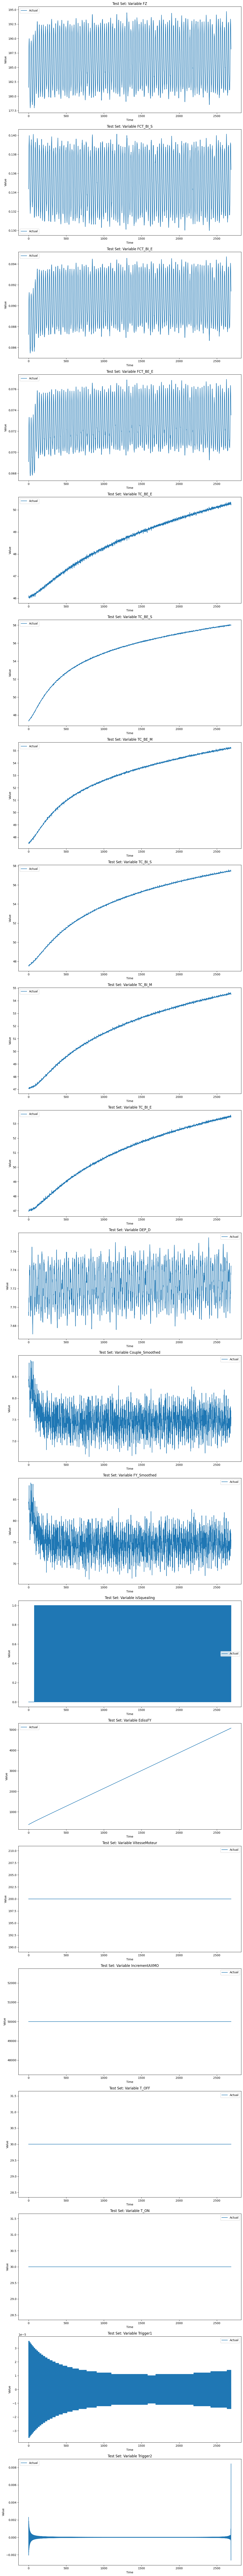

In [11]:
# Get the variable names from the original dataset
column_names = data.columns.tolist()

# Visualize true values for each variable on the test set
fig, axs = plt.subplots(len(column_names), figsize=(12, 6*len(column_names)))

for i, column in enumerate(column_names):
    actual_values_test = data_filtered[column].values[window_size:]
    axs[i].plot(actual_values_test, label='Actual')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].set_title('Test Set: Variable {}'.format(column))
    axs[i].legend()

plt.tight_layout()
plt.show()

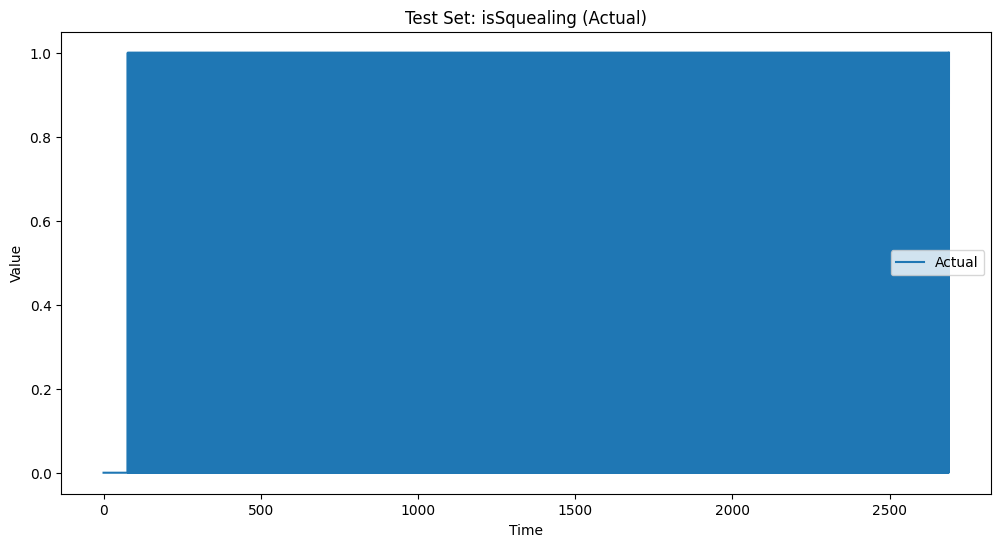

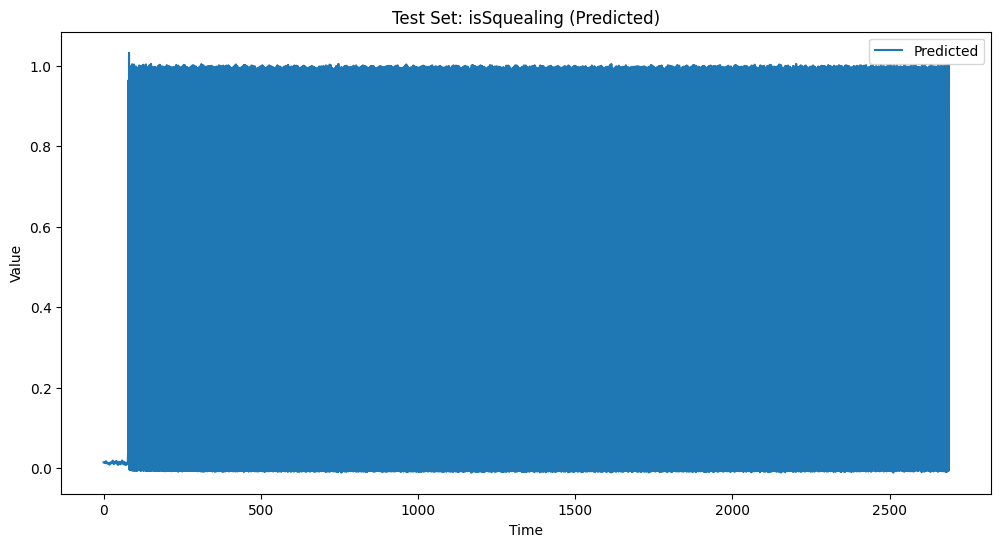

In [12]:
# Plot the true values for the 'isSquealing' channel
plt.figure(figsize=(12, 6))
plt.plot(y_test_data, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set: isSquealing (Actual)')
plt.legend()
plt.show()

# Visualize predicted values for the 'isSquealing' channel on the test set
plt.figure(figsize=(12, 6))
plt.plot(y_pred_test, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set: isSquealing (Predicted)')
plt.legend()
plt.show()

## Predicting isSquealing without filtered Trigger2

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef

In [4]:
# Set the directory path containing the CSV files
directory = "Two_Dataset_Selected_Columns_Int"

# Select the specific file for testing
file_to_test = "essai99_derivativeDataIA_combined.csv"

# Lists to store data
X_train_data = []
y_train_data = []
X_val_data = []
y_val_data = []
X_test_data = []
y_test_data = []

# Split the files into training, validation, and testing sets
file_list = os.listdir(directory)
train_files, val_files, test_files = np.split(file_list, [int(len(file_list) * 0.7), int(len(file_list) * 0.85)])

# Remove the test file from the test_files list
test_files = [file for file in test_files if file != file_to_test]

# Iterate over files in the specified directory
for file in file_list:
    if file.endswith(".csv"):
        filepath = os.path.join(directory, file)
        data = pd.read_csv(filepath)

#         # Filter out instances where Trigger2 is not close to the most occurred value
#         trigger2_mode = data['Trigger2'].mode()[0]
#         close_threshold = 0.01  # Adjust this threshold as per your requirement
#         data_filtered = data[np.abs(data['Trigger2'] - trigger2_mode) < close_threshold]
        data_filtered = data
        # Find the index of the 'isSquealing' column
        isSquealing_index = list(data.columns).index('isSquealing')

        # Split the data into input sequences (X) and output sequences (y)
        window_size = 6
        X = []
        y = []
        for i in range(len(data_filtered) - window_size):
            X.append(data_filtered.iloc[i:i + window_size, :-1].values)
            y.append(data_filtered.iloc[i + window_size, isSquealing_index])

        if file in train_files:
            X_train_data.extend(X)
            y_train_data.extend(y)
        elif file in val_files:
            X_val_data.extend(X)
            y_val_data.extend(y)
        elif file == file_to_test:
            X_test_data.extend(X)
            y_test_data.extend(y)

# Convert the lists to arrays
X_train_data = np.array(X_train_data)
y_train_data = np.array(y_train_data)
X_val_data = np.array(X_val_data)
y_val_data = np.array(y_val_data)
X_test_data = np.array(X_test_data)
y_test_data = np.array(y_test_data)

# Data preprocessing

In [5]:
# Reshape the input data to 2-dimensional shape
X_train_flat = X_train_data.reshape((X_train_data.shape[0], -1))
X_val_flat = X_val_data.reshape((X_val_data.shape[0], -1))
X_test_flat = X_test_data.reshape((X_test_data.shape[0], -1))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_flat = imputer.fit_transform(X_train_flat)
X_val_flat = imputer.transform(X_val_flat)
X_test_flat = imputer.transform(X_test_flat)

# Reshape the data back to the original shape
X_train = X_train_flat.reshape((X_train_data.shape[0], window_size, -1))
X_val = X_val_flat.reshape((X_val_data.shape[0], window_size, -1))
X_test = X_test_flat.reshape((X_test_data.shape[0], window_size, -1))

# Reshape the data for StandardScaler
X_train_scaled = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val.reshape((X_val.shape[0] * X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_val_scaled = scaler.transform(X_val_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape X_train_scaled, X_val_scaled, and X_test_scaled back to the original shape
X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val_scaled = X_val_scaled.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# LSTM model

In [6]:
# Define the model architecture
model = keras.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(window_size, X_train_scaled.shape[2])))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train_data,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_data)
)

Epoch 1/10
52161/52161 [==============================] - 168s 3ms/step - loss: 0.0138 - mae: 0.0504 - val_loss: 0.1154 - val_mae: 0.1762
Epoch 2/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0124 - mae: 0.0471 - val_loss: 0.6906 - val_mae: 0.3321
Epoch 3/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0122 - mae: 0.0468 - val_loss: 0.6185 - val_mae: 0.3662
Epoch 4/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0121 - mae: 0.0466 - val_loss: 0.5026 - val_mae: 0.2932
Epoch 5/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0120 - mae: 0.0465 - val_loss: 0.7432 - val_mae: 0.4180
Epoch 6/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0119 - mae: 0.0464 - val_loss: 1.0957 - val_mae: 0.4005
Epoch 7/10
52161/52161 [==============================] - 164s 3ms/step - loss: 0.0119 - mae: 0.0461 - val_loss: 1.1881 - val_mae: 0.4323
Epoch 8/10
52161/52161 [==========

# Predicitons

In [7]:
# Generate predictions on the test set
y_pred_test = model.predict(X_test_scaled)


# Convert the predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred_test > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_data, y_pred_binary)

# Calculate precision
precision = precision_score(y_test_data, y_pred_binary)

# Calculate recall (sensitivity)
recall = recall_score(y_test_data, y_pred_binary)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_data, y_pred_binary).ravel()
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test_data, y_pred_binary)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_data, y_pred_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Matthews Correlation Coefficient (MCC):", mcc)

119/119 [==============================] - 0s 1ms/step
Accuracy: 0.9984139571768438
Precision: 0.9977924944812362
Recall (Sensitivity): 0.9977924944812362
Specificity: 0.9987623762376238
F1 Score: 0.9977924944812362
ROC AUC Score: 0.9999471801484785
Matthews Correlation Coefficient (MCC): 0.99655487071886


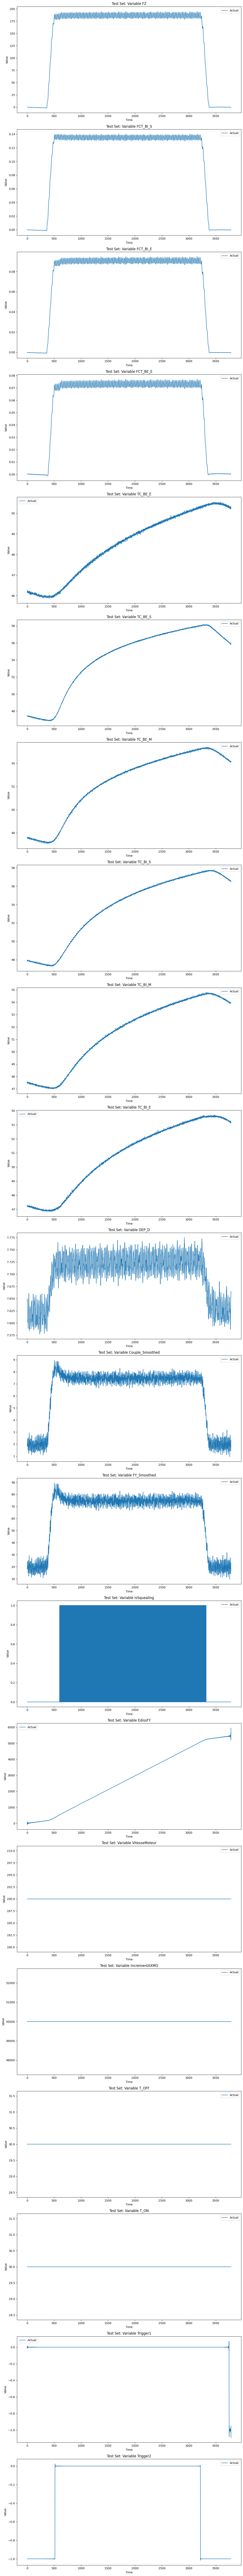

In [8]:
# Get the variable names from the original dataset
column_names = data.columns.tolist()

# Visualize true values for each variable on the test set
fig, axs = plt.subplots(len(column_names), figsize=(12, 6*len(column_names)))

for i, column in enumerate(column_names):
    actual_values_test = data_filtered[column].values[window_size:]
    axs[i].plot(actual_values_test, label='Actual')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].set_title('Test Set: Variable {}'.format(column))
    axs[i].legend()

plt.tight_layout()
plt.show()

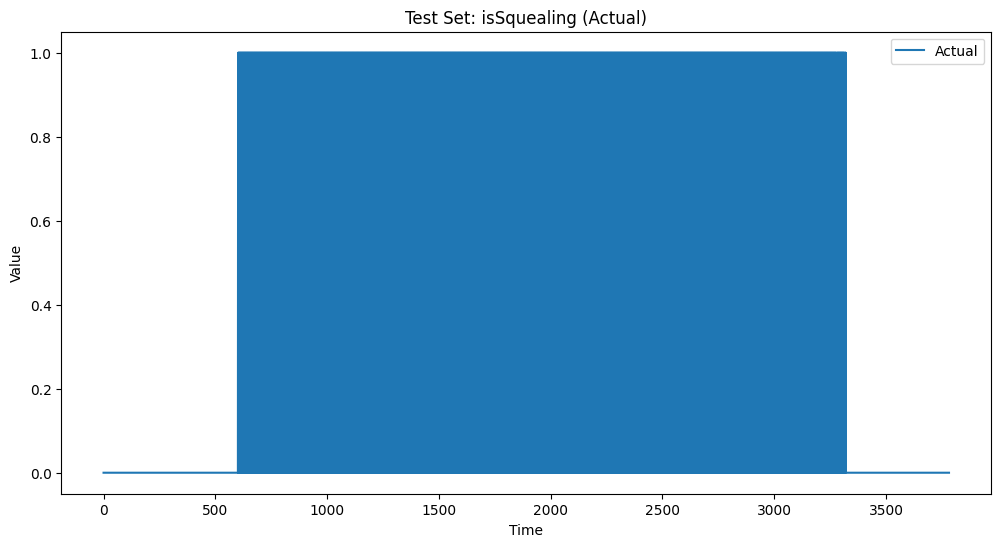

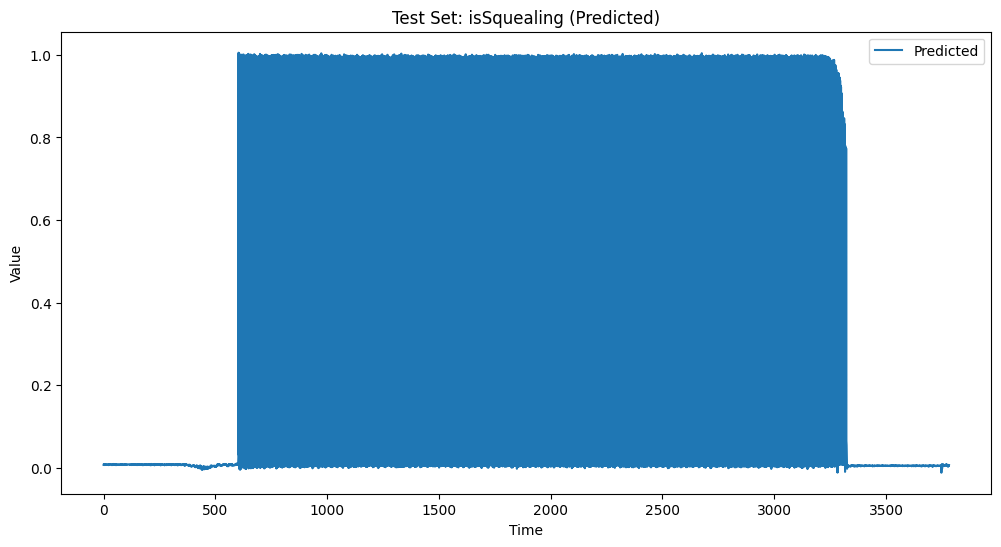

In [9]:
# Plot the true values for the 'isSquealing' channel
plt.figure(figsize=(12, 6))
plt.plot(y_test_data, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set: isSquealing (Actual)')
plt.legend()
plt.show()

# Visualize predicted values for the 'isSquealing' channel on the test set
plt.figure(figsize=(12, 6))
plt.plot(y_pred_test, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set: isSquealing (Predicted)')
plt.legend()
plt.show()